# <a id='toc1_'></a>[The Swan-Solow Model](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [The Swan-Solow Model](#toc1_)    
  - [Short Introduction to Model Project](#toc1_1_)    
  - [Define the standard Solow Model](#toc1_2_)    
    - [Define Steady State](#toc1_2_1_)    
  - [Initiate Code](#toc1_3_)    
    - [Libraries](#toc1_3_1_)    
    - [Example Code form PS6](#toc1_3_2_)    
  - [Solow Model (Vanilla)](#toc1_4_)    
    - [Interactive Graph for Basic Solow Model](#toc1_4_1_)    
  - [Solow Model with Oil and Land](#toc1_5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

------

## <a id='toc1_1_'></a>[Short Introduction to Model Project](#toc0_)

This project is about the Swan-Solow Model. The model is a neoclassical growth model, which is a model of long-run economic growth set within the framework of neoclassical economics. The model was developed simultaneously by Robert Solow and Trevor Swan in 1956. The model is also known as the exogenous growth model or the Solow–Swan growth model.

The models capabilities are to explain the long-run growth of an economy by looking at capital accumulation, labor or population growth, and increases in productivity, known as technological progress. The model is used to show how changes in the saving rate, the population growth rate, and the rate of technological progress affect the level of and growth in the standard of living. The model also shows how changes in these factors affect the economy’s output, employment, and the real interest rate.

This porject will incooperate **Land and Oil** as a new factor of production. The model will be used to show how changes in the saving rate, the population growth rate, the rate of technological progress, the amount of land and the amount of oil affect the level of and growth in the standard of living. The model will also show how changes in these factors affect the economy’s output, employment, and the real interest rate.

-----

## <a id='toc1_2_'></a>[Define the standard Solow Model](#toc0_)

Below is the Standard Solow model defined. This was copied from Problem Set 6 - Numerical Programming.




Consider the **standard Solow-model** where:

1. $K_t$ is capital2
2. $L_t$ is labor (growing with a constant rate of $n$)
3. $A_t$ is technology (growing with a constant rate of $g$)
4. $Y_t = F(K_t,A_tL_t)$ is GDP

The Cobb Douglas function for the representative firm is given by:
$$
Y_t=K_t^\alpha (A_t L_t)^{1-\alpha}
$$

**Saving** is a constant fraction of GDP

$$ 
S_t = sY_t,\,s\in(0,1)
$$

such that **capital accumulates** according to

$$
K_{t+1}=S_{t}+(1-\delta)K_{t}=sF(K_{t},A_{t}L_{t})+(1-\delta)K_{t}, \delta \in (0,1)
$$

The **production function** has **constant-return to scale** such that

$$
\frac{Y_{t}}{A_{t}L_{t}}=\frac{F(K_{t},A_{t}L_{t})}{A_{t}L_{t}}=F(\tilde{k}_{t},1)\equiv f(\tilde{k}_{t})
$$

where $\tilde{k}_t = \frac{K_t}{A_{t}L_{t}}$ is the technology adjusted capital-labor ratio.

The **transition equation** then becomes

$$
\tilde{k}_{t+1}= \frac{1}{(1+n)(1+g)}[sf(\tilde{k}_{t})+(1-\delta)\tilde{k}_{t}]
$$

If the **production function** is **Cobb-Douglas** then

$$
F(K_{t},A_{t}L_{t})=K_{t}^{\alpha}(A_{t}L_{t})^{1-\alpha}\Rightarrow f(\tilde{k}_{t})=\tilde{k}_{t}^{\alpha}
$$

If it is **CES** (with $\beta < 1, \beta \neq 0$) then

$$
F(K_{t},A_{t}L_{t})=(\alpha K_{t}^{\beta}+(1-\alpha)(A_{t}L_{t})^{\beta})^{\frac{1}{\beta}}\Rightarrow f(\tilde{k}_{t})=(\alpha\tilde{k}_{t}^{\beta}+(1-\alpha))^{\frac{1}{\beta}}
$$


### <a id='toc1_2_1_'></a>[Define Steady State](#toc0_)

We assume that the production function is **Cobb-Douglas**.

Therefore the steady state is defined as: 

$$
\tilde{k}^{\ast}= \frac{1}{(1+n)(1+g)}[sf(\tilde{k}^{\ast})+(1-\delta)\tilde{k}^{\ast}]
$$

----

## <a id='toc1_3_'></a>[Initiate Code](#toc0_)

This section initiates the code by importing the relevant packages and defining the parameters.

### <a id='toc1_3_1_'></a>[Libraries](#toc0_)

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np
from scipy import linalg
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
import pandas as pd

### <a id='toc1_3_2_'></a>[Example Code form PS6](#toc0_)

In [2]:
s = 0.2
g = 0.02
n = 0.01
alpha = 1/3
delta = 0.1

# write your code here
f = lambda k: k**alpha
obj_kss = lambda kss: kss - (s*f(kss) + (1-delta)*kss)/((1+g)*(1+n))
result = optimize.root_scalar(obj_kss,bracket=[0.1,100],method='brentq')

print('the steady state for k is', result.root)   

betas = [-0.5,-0.25,-0.1,-0.05,0.05,0.1,0.25,0.5]

for beta in betas:
    f = lambda k: (alpha*k**beta + (1-alpha))**(1/beta)
    obj_kss = lambda kss: kss - (s*f(kss) + (1-delta)*kss)/((1+g)*(1+n))
    result = optimize.root_scalar(obj_kss,bracket=[0.1,100],method='brentq')
    print(f'for beta = {beta:.3f} the steady state for k is',result.root) 

the steady state for k is 1.9038315392313185
for beta = -0.500 the steady state for k is 1.8471297000972984
for beta = -0.250 the steady state for k is 1.873383262758588
for beta = -0.100 the steady state for k is 1.8910856397655083
for beta = -0.050 the steady state for k is 1.8973581025712734
for beta = 0.050 the steady state for k is 1.9105159729244352
for beta = 0.100 the steady state for k is 1.917422132817728
for beta = 0.250 the steady state for k is 1.9395902733676993
for beta = 0.500 the steady state for k is 1.9822334997701418


------

## <a id='toc1_4_'></a>[Solow Model (Vanilla)](#toc0_)

This is the computation of the basic Solow Model with the initial parameters:
- $\alpha$ = 0.33
- $s$ = 0.2
- $n$ = 0.01
- $g$ = 0.02
- $\delta$ = 0.05
- $k_0$ = 1

The model is computed for 100 periods.



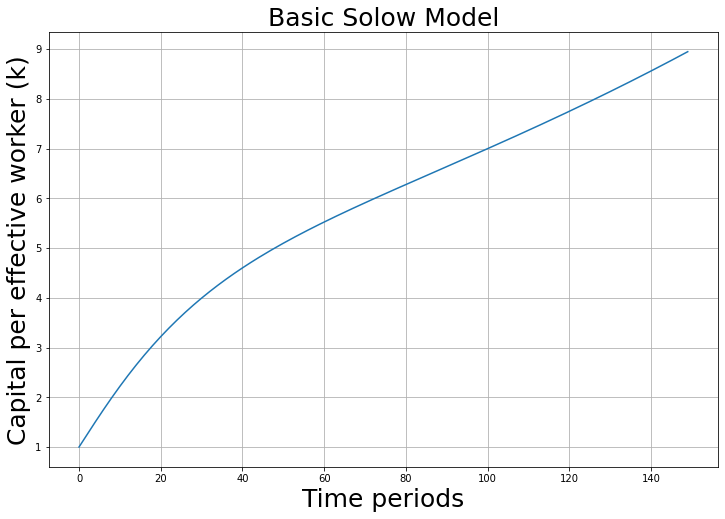

In [3]:
# Step 1: Import required libraries
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Define the Cobb-Douglas production function
def cobb_douglas(K, L, A, alpha):
    """
    K: Capital
    L: Labor
    A: Total Factor Productivity (TFP)
    alpha: Output elasticity of capital
    """
    return A * K**alpha * L**(1 - alpha)

# Step 3: Define the Solow model parameters
savings_rate = 0.2
depreciation_rate = 0.05
population_growth_rate = 0.01
technology_growth_rate = 0.01
initial_capital = 1
initial_labor = 1
initial_A = 1
alpha = 0.33
time_periods = 150

# Step 4: Initialize variables
K = np.zeros(time_periods)
L = np.zeros(time_periods)
A = np.zeros(time_periods)
Y = np.zeros(time_periods)
k = np.zeros(time_periods)

# Step 5: Initialize the first time period
K[0] = initial_capital
L[0] = initial_labor
A[0] = initial_A
Y[0] = cobb_douglas(K[0], L[0], A[0], alpha)
k[0] = K[0] / (A[0] * L[0])

# Step 6: Iterate through the Solow model
for t in range(1, time_periods):
    K[t] = K[t - 1] * (1 - depreciation_rate) + savings_rate * Y[t - 1]
    L[t] = L[t - 1] * (1 + population_growth_rate)
    A[t] = A[t - 1] * (1 + technology_growth_rate)
    Y[t] = cobb_douglas(K[t], L[t], A[t], alpha)
    k[t] = K[t] / (A[t] * L[t])

# Step 7: Plot the results
plt.figure(figsize=(12, 8))
plt.plot(k)
plt.xlabel('Time periods', size = 25)
plt.ylabel('Capital per effective worker (k)', size = 25)
plt.title('Basic Solow Model', size = 25)
plt.grid()
plt.show()

### <a id='toc1_4_1_'></a>[Interactive Graph for Basic Solow Model](#toc0_)

The interactive graph with interactive value for savings. 


In [4]:
# Create a widget to interact with the graph add a slider for the savings rate
# use "play" from the widget to see the effect of the savings rate on the graph
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import warnings


# define 100 values in list of savings rates
savings = np.linspace(0.01, 0.5, 100)
alphas = np.linspace(0.01, 0.99, 100)
inital_k = np.linspace(0.01, 0.99, 100)
depreciation_rate = np.linspace(0.01, 0.99, 100)


# define a function that takes savings, alphas, inital_k, depreciation_rate as inputs and play them in an interactive graph
def solow(savings, alphas, inital_k, depreciation_rate, time):
    savings_rate = savings
    depreciation_rate = depreciation_rate
    population_growth_rate = 0.01
    technology_growth_rate = 0.01
    initial_capital = inital_k
    initial_labor = 1
    initial_A = 1
    alpha = alphas
    time_periods = time

    # Initialize variables
    K = np.zeros(time_periods)
    L = np.zeros(time_periods)
    A = np.zeros(time_periods)
    Y = np.zeros(time_periods)
    k = np.zeros(time_periods)

    # Initialize the first time period
    K[0] = initial_capital
    L[0] = initial_labor
    A[0] = initial_A
    Y[0] = cobb_douglas(K[0], L[0], A[0], alpha)
    k[0] = K[0] / (A[0] * L[0])

    # Iterate through the Solow model
    for t in range(1, time_periods):
        K[t] = K[t - 1] * (1 - depreciation_rate) + savings_rate * Y[t - 1]
        L[t] = L[t - 1] * (1 + population_growth_rate)
        A[t] = A[t - 1] * (1 + technology_growth_rate)
        Y[t] = cobb_douglas(K[t], L[t], A[t], alpha)
        k[t] = K[t] / (A[t] * L[t])

    # Plot the results
    plt.figure(figsize=(20, 8))
    plt.plot(k, label = 'Capital per effective worker')
    
    plt.xlabel('Time periods', size=25)
    plt.ylabel('Capital per effective worker (k)', size=25)
    plt.title('Basic Solow Model', size=25)
    plt.axhline(y = k[-1], color = 'r', linestyle = '--', label = 'Steady state')
    plt.legend(fontsize = 15)
    plt.grid()
    plt.show()

## create a widget to interact with the graph as sliders, with start values in the widget to 0.01.
# include slider in the graph for savings rate, alphas, inital_k, depreciation_rate
# use the "FloatSlider" from the widget to see the effect of the savings rate on the graph


savings = widgets.FloatSlider(  # savings rate slider   
                            value=0.01,
                            min=0.01,
                            max=0.5,
                            step=0.01,
                            description='Savings rate:',
                            disabled=False,
                            continuous_update=False,
                            orientation='horizontal',
                            readout=True,
                            readout_format='.2f',
                            )

alphas = widgets.FloatSlider(  # alphas slider
                            value=0.01,
                            min=0.01,
                            max=0.99,
                            step=0.01,
                            description='Alphas:',
                            disabled=False,
                            continuous_update=False,
                            orientation='horizontal',
                            readout=True,
                            readout_format='.2f',
                            )

inital_k = widgets.FloatSlider(  # inital_k slider
                            value=0.01,
                            min=0.01,
                            max=0.99,
                            step=0.01,
                            description='Inital_k:',
                            disabled=False,
                            continuous_update=False,
                            orientation='horizontal',
                            readout=True,
                            readout_format='.2f',
                            )

depreciation_rate = widgets.FloatSlider(  # depreciation_rate slider
                            value=0.01,
                            min=0.01,
                            max=0.99,
                            step=0.01,
                            description='Depreciation_rate:',
                            disabled=False,
                            continuous_update=False,
                            orientation='horizontal',
                            readout=True,
                            readout_format='.2f',
                            )

time_p = widgets.IntSlider(  # time_periods slider
                            value=100,
                            min=1,
                            max=2000,
                            step=1,
                            description='Time_periods:',
                            disabled=False,
                            continuous_update=False,
                            orientation='horizontal',
                            readout=True,
                            readout_format='.2f',
                            )

widgets.interact(solow, savings=savings, alphas=alphas, inital_k=inital_k, depreciation_rate=depreciation_rate, time = time_p)

warnings.filterwarnings('ignore')


interactive(children=(FloatSlider(value=0.01, continuous_update=False, description='Savings rate:', max=0.5, m…

------

## <a id='toc1_5_'></a>[Solow Model with Oil and Land](#toc0_)

We add oil and land to the model to add more dimensions to the model

Now the production function for the representative firm is given by:

$$ 
Y_t=K_t^\alpha (A_t L_t)^\beta X^\kappa E_t^\epsilon, \hspace{5mm}    \alpha>0, \beta>0, \kappa>0, \epsilon>0, \hspace{5mm}  \alpha+\beta+\kappa+\epsilon=1
$$

Where $X$ is land and $E_t$ is oil

$$
L_t=(1+n)L_t, \hspace{5mm}   n\geq0
$$

$$
A_{t+1}=(1+g)A_t, \hspace{5mm} g\geq0
$$

The depletion of the natural ressource is described by: 
$$
R_{t+1}=R_t-E_t
$$

Where $R_t$ is the remaining stock of oil in each period and $E_t$ is how much is oil is consumed.

the oil consumption is given as:

$$
E_t=s_E R_t , \hspace{5mm} 0<s_E<1
$$

**Saving** is still a constant fraction of GDP

$$ 
S_t = sY_t,\,s\in(0,1)
$$

such that **capital accumulates** according to

$$
K_{t+1}=S_{t}+(1-\delta)K_{t}=sF(K_{t},A_{t}L_{t},X,E_t)+(1-\delta)K_{t}, \delta \in (0,1)
$$

Inserting $E_t=s_E R_t$ into the production function and dividing both sides by $L_t$ yields

$$
y_t=k_t^\alpha A_t^\beta (\frac{X}{L_t})^\kappa (\frac{s_E R_t}{L_t})^\epsilon = s_E^\epsilon X^\kappa k_t^\alpha A_t^\beta R_t^\epsilon L_t^{-\kappa-\epsilon}
$$

By taking logs we get the following:

$$
g_t^y=\alpha g_t^k+\beta g_t^A + \epsilon g_t^R - (\kappa+\epsilon)g_t^L \approx \alpha g_t^k +\beta g - \epsilon s_E - (\kappa+\epsilon)n
$$

As $g_t^y$ and $g_t^k$ converge towards the same rate they are set equal. This yields:

$$
g^y=\frac{\beta}{\beta+\kappa+\epsilon}g-\frac{\kappa + \epsilon}{\beta+\kappa+\epsilon}n - \frac{\epsilon}{\beta+\kappa+\epsilon}s_E
$$